In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from models import MLP
from optimizers import sgdm, fgsmm
from utils_train import get_data_loaders, train, train_at, train_alp, train_atpx, train_ara, train_arapx, test

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
seed = 0 # Set the random seed, so the experiment is reproducible
torch.manual_seed(seed)
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
batch_size = 32 # We use a batch size of 32 examples while training, and 1000 while testing
test_batch_size = 1000
momentum = 0.5 # We will use SGD with a momentum term
lr = 0.01 # The learning rate
epochs = 5 # The number of epochs
im_size = 28*28 # The size of the input. MNIST are greyscale images, 28x28 pixels each

In [3]:
train_loader, test_loader = get_data_loaders(batch_size, test_batch_size)

In [4]:
model = MLP(im_size).to(device)
optimizer = optim.SGD(model.parameters(), lr=lr,
                      momentum=momentum)

In [5]:
train = False
if train:
    training_losses = []
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, training_losses)
        test(model, device, test_loader)

In [6]:
#torch.save(model.state_dict(), 'mlp.bin')

In [12]:
model = MLP(im_size).to(device)
model.load_state_dict(torch.load('mlp.bin'))

<All keys matched successfully>

## Training with AT

In [8]:
model_at = MLP(im_size).to(device)
optimizer = optim.SGD(model_at.parameters(), lr=lr, momentum=momentum)

In [9]:
train = True
if train:
    training_losses = []
    for epoch in range(1, epochs + 1):
        train_at(model_at, device, train_loader, optimizer, epoch, training_losses)
        #test(model, device, test_loader)
test(model_at, device, test_loader)

/home/victor/sandbox/sgmcmc4ara/models.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.586755
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.395875
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.392236
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.080673
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.329648
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.131830
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.223070
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.082781
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.209828
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.264490

Test set: Average loss: 0.1031, Accuracy: 9676/10000 (97%)



In [10]:
torch.save(model_at.state_dict(), 'mlp_at.bin')

In [11]:
model_at = MLP(im_size).to(device)
model_at.load_state_dict(torch.load('mlp_at.bin'))

<All keys matched successfully>

In [4]:
model_atpx = MLP(im_size).to(device)
optimizer = optim.SGD(model_atpx.parameters(), lr=lr, momentum=momentum)

train = True
if train:
    training_losses = []
    for epoch in range(1, epochs + 1):
        train_atpx(model_atpx, device, train_loader, optimizer, epoch, training_losses)
        #test(model, device, test_loader)
test(model_atpx, device, test_loader)


/home/victor/sandbox/sgmcmc4ara/models.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.505699
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.821072
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.388468
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.383399
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.391831
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.485502
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.360737
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.351221
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.423970
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.508609

Test set: Average loss: 0.1561, Accuracy: 9568/10000 (96%)



<All keys matched successfully>

In [10]:
#torch.save(model_atpx.state_dict(), 'mlp_atpx.bin')
model_atpx = MLP(im_size).to(device)
model_atpx.load_state_dict(torch.load('mlp_atpx.bin'))

<All keys matched successfully>

## Training with ARAAT

In [13]:
model_ara = MLP(im_size).to(device)
optimizer = optim.SGD(model_ara.parameters(), lr=lr,
                      momentum=momentum)

In [14]:
train = True
if train:
    training_losses = []
    for epoch in range(1, epochs + 1):
        train_ara(model_ara, device, train_loader, optimizer, epoch, training_losses)
        #test(model, device, test_loader)
test(model_ara, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.708365
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.017482
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.369104
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.825053
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.496589
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.706184
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.353049
Train Epoch: 4 [32000/60000 (53%)]	Loss: 1.072289
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.275397
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.445577

Test set: Average loss: 0.1832, Accuracy: 9560/10000 (96%)



In [9]:
#torch.save(model_ara.state_dict(), 'mlp_ara.bin')

model_ara = MLP(im_size).to(device)
model_ara.load_state_dict(torch.load('mlp_ara.bin'))

<All keys matched successfully>

In [5]:
model_arapx = MLP(im_size).to(device)
optimizer = optim.SGD(model_arapx.parameters(), lr=lr,
                      momentum=momentum)

train = True
if train:
    training_losses = []
    for epoch in range(1, epochs + 1):
        train_arapx(model_arapx, device, train_loader, optimizer, epoch, training_losses)
        #test(model, device, test_loader)
test(model_arapx, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.886061
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.003988
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.471333
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.076714
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.588362
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.287972
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.190712
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.252429
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.516121
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.469655

Test set: Average loss: 0.2067, Accuracy: 9473/10000 (95%)



In [8]:
#torch.save(model_arapx.state_dict(), 'mlp_arapx.bin')

model_arapx = MLP(im_size).to(device)
model_arapx.load_state_dict(torch.load('mlp_arapx.bin'))

<All keys matched successfully>

## Training with ALP

In [6]:
model_alp = MLP(im_size).to(device)
optimizer = optim.SGD(model_alp.parameters(), lr=lr,
                      momentum=momentum)

train = True
if train:
    training_losses = []
    for epoch in range(1, epochs + 1):
        train_alp(model_alp, device, train_loader, optimizer, epoch, training_losses)
        #test(model, device, test_loader)
test(model_alp, device, test_loader)

/home/victor/sandbox/sgmcmc4ara/models.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.468363
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.462306
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.411466
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.509002
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.379494
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.284056
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.256590
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.509348
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.234332
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.360451

Test set: Average loss: 0.1593, Accuracy: 9616/10000 (96%)



In [7]:
torch.save(model_alp.state_dict(), 'mlp_alp.bin')

model_alp = MLP(im_size).to(device)
model_alp.load_state_dict(torch.load('mlp_alp.bin'))

<All keys matched successfully>

## Full atack & defense evaluation 

In [25]:
strenghts = np.linspace(0., 0.15, 14)

def evaluate_attack(model, strenghts):
    accs = []

    for s in strenghts:

        test_loss = 0
        correct = 0
        model.train()

        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data.requires_grad_(True)
            v = torch.zeros_like(data)
            xv = (data, v)

            def adv_loss(x, y = target):
                return -F.nll_loss(model(x), y)

            xx, mmsgf = fgsmm(adv_loss, xv, T = 5, lr = s, gamma = 0.)
            output = model(xx[0])
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(test_loader.dataset)

        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))

        accs.append(correct / len(test_loader.dataset))
    return accs


accs = evaluate_attack(model, strenghts)
accs_at = evaluate_attack(model_at, strenghts)
accs_alp = evaluate_attack(model_alp, strenghts)
accs_atpx = evaluate_attack(model_atpx, strenghts)
accs_ara = evaluate_attack(model_ara, strenghts)
accs_arapx = evaluate_attack(model_arapx, strenghts)


Test set: Average loss: 0.1095, Accuracy: 9684/10000 (97%)


Test set: Average loss: 0.3644, Accuracy: 8815/10000 (88%)


Test set: Average loss: 1.0435, Accuracy: 6526/10000 (65%)


Test set: Average loss: 2.3629, Accuracy: 3393/10000 (34%)


Test set: Average loss: 4.2271, Accuracy: 1422/10000 (14%)


Test set: Average loss: 6.3695, Accuracy: 551/10000 (6%)


Test set: Average loss: 8.5961, Accuracy: 207/10000 (2%)


Test set: Average loss: 10.8209, Accuracy: 92/10000 (1%)


Test set: Average loss: 13.0112, Accuracy: 41/10000 (0%)


Test set: Average loss: 15.1600, Accuracy: 23/10000 (0%)


Test set: Average loss: 17.2647, Accuracy: 15/10000 (0%)


Test set: Average loss: 19.3372, Accuracy: 8/10000 (0%)


Test set: Average loss: 21.3758, Accuracy: 4/10000 (0%)


Test set: Average loss: 23.3882, Accuracy: 3/10000 (0%)


Test set: Average loss: 0.1031, Accuracy: 9676/10000 (97%)


Test set: Average loss: 0.2054, Accuracy: 9331/10000 (93%)


Test set: Average loss: 0.3876, Accuracy: 87

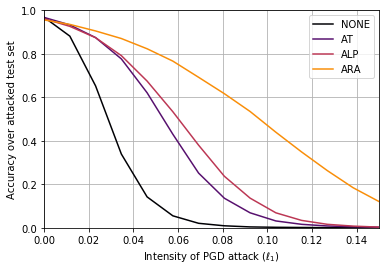

In [27]:
from matplotlib import cm

start = 0.0
stop = .75
number_of_lines = 4
cm_subsection = np.linspace(start, stop, number_of_lines) 

colors = [ cm.inferno(x) for x in cm_subsection ]

plt.plot(strenghts, accs, color=colors[0])
plt.plot(strenghts, accs_at, color=colors[1])
plt.plot(strenghts, accs_alp, color=colors[2])
#plt.plot(strenghts, accs_atpx, color=colors[3])
plt.plot(strenghts, accs_ara, color=colors[3])
#plt.plot(strenghts, accs_arapx, color=colors[5])
plt.grid(True)
plt.ylim([0., 1.])
#plt.ylim([0.7, 1.])
plt.xlim([0., 0.15])
#plt.legend(['NONE', 'AT', 'ALP', 'ATPX', 'ARA', 'ARAPX'])
plt.legend(['NONE', 'AT', 'ALP', 'ARA'])
plt.xlabel('Intensity of PGD attack ($\ell_1$)')
#plt.xlabel('Intensity of FGSM attack')
plt.ylabel('Accuracy over attacked test set')

#plt.savefig('img/comparison_mnist_fgsm.png', dpi=300)
plt.savefig('img/comparison_mnist_pgdl1.png', dpi=300)

## Energy comparisons

In [8]:
def compute_test_energy(lr_a, model):
    test_loss = 0
    correct = 0
    e = 0.
    model.train()

    def energy(x):
        return -torch.logsumexp(model.logits(x), dim=1)

    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        data.requires_grad_(True)
        v = torch.zeros_like(data)
        xv = (data, v)

        def adv_loss(x, y = target):
            return -F.nll_loss(model(x), y)

        xx, mmsgf = fgsmm(adv_loss, xv, T = 1, lr = lr_a, gamma = 0.)

        e += energy(xx[0]).sum()

    return e / len(test_loader.dataset)


model = MLP(im_size).to(device)
model.load_state_dict(torch.load('mlp.bin'))
nat = compute_test_energy(0., model)
att = compute_test_energy(0.15, model)
print(nat)
print(att)
print('Energy gap: ', torch.abs(att - nat))

model_at = MLP(im_size).to(device)
model_at.load_state_dict(torch.load('mlp_at.bin'))
nat = compute_test_energy(0., model_at)
att = compute_test_energy(0.15, model_at)
print(nat)
print(att)
print('Energy gap: ', torch.abs(att - nat))

model_atpx = MLP(im_size).to(device)
model_atpx.load_state_dict(torch.load('mlp_atpx.bin'))
nat = compute_test_energy(0., model_atpx)
att = compute_test_energy(0.15, model_atpx)
print(nat)
print(att)
print('Energy gap: ', torch.abs(att - nat))


model_ara = MLP(im_size).to(device)
model_ara.load_state_dict(torch.load('mlp_ara.bin'))
nat = compute_test_energy(0., model_ara)
att = compute_test_energy(0.15, model_ara)
print(nat)
print(att)
print('Energy gap: ', torch.abs(att - nat))


model_arapx = MLP(im_size).to(device)
model_arapx.load_state_dict(torch.load('mlp_arapx.bin'))
nat = compute_test_energy(0., model_arapx)
att = compute_test_energy(0.15, model_arapx)
print(nat)
print(att)
print('Energy gap: ', torch.abs(att - nat))

tensor(-10.7167, device='cuda:0', grad_fn=<DivBackward0>)
tensor(-8.5127, device='cuda:0', grad_fn=<DivBackward0>)
Energy gap:  tensor(2.2040, device='cuda:0', grad_fn=<AbsBackward>)
tensor(-9.6051, device='cuda:0', grad_fn=<DivBackward0>)
tensor(-7.8324, device='cuda:0', grad_fn=<DivBackward0>)
Energy gap:  tensor(1.7727, device='cuda:0', grad_fn=<AbsBackward>)
tensor(8.1070, device='cuda:0', grad_fn=<DivBackward0>)
tensor(8.0701, device='cuda:0', grad_fn=<DivBackward0>)
Energy gap:  tensor(0.0369, device='cuda:0', grad_fn=<AbsBackward>)
tensor(-7.3334, device='cuda:0', grad_fn=<DivBackward0>)
tensor(-6.5552, device='cuda:0', grad_fn=<DivBackward0>)
Energy gap:  tensor(0.7782, device='cuda:0', grad_fn=<AbsBackward>)
tensor(5.1082, device='cuda:0', grad_fn=<DivBackward0>)
tensor(5.1786, device='cuda:0', grad_fn=<DivBackward0>)
Energy gap:  tensor(0.0704, device='cuda:0', grad_fn=<AbsBackward>)
